<a href="https://colab.research.google.com/github/robsworld718/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename = '/content/sales_predictions.csv'

In [3]:
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
## How many rows: 8523
## How many colums: 12

In [5]:
df.shape

(8523, 12)

In [6]:
## MISSING VALUES in Item_Weight, Outlet_Size

In [7]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.duplicated().any()

False

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
## MISSING is a dataframe. 
missing = df.isnull()
num_missing = missing.sum()
num_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [14]:
## Missing 2 is a dataframe. 
missing2 = df.isnull()
num_missing2 = missing2.sum()
num_missing2

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
(num_missing / len(df)) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [17]:
#45values of our data is missing from 2 different collums
(num_missing / len(df)).sum()

0.4544174586413235

In [18]:
len(df)

8523

In [19]:
## LET's LOOK AT ITEM WEIGHT DISTRIBUTION

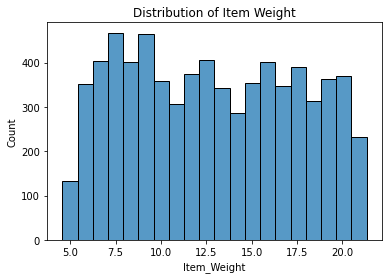

In [20]:
ax = sns.histplot(data=df, x='Item_Weight',bins='auto');
ax.set_title('Distribution of Item Weight');

In [21]:
# SWAP MEAN FOR MEDIAN
df['Item_Weight'].fillna(int(df['Item_Weight'].mean()), inplace=True)

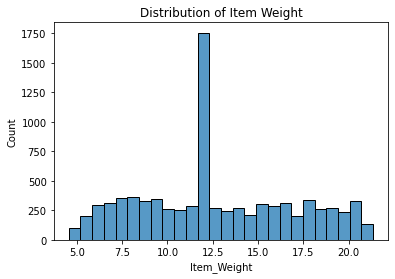

In [22]:
ax = sns.histplot(data=df, x='Item_Weight',bins='auto');
ax.set_title('Distribution of Item Weight');

In [23]:
df['Item_Weight'].isnull().sum()

0

In [24]:
## LET's LOOK AT OUTLET SIZE

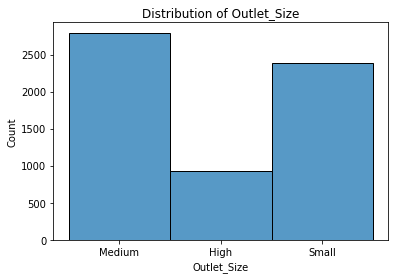

In [25]:
ax = sns.histplot(data=df, x='Outlet_Size');
ax.set_title('Distribution of Outlet_Size');

In [26]:
# COULD ALSO BE CORRECT CODE
df['Outlet_Size'].fillna('Medium', inplace=True)

In [27]:
df['Outlet_Size'].isnull().sum()

0

In [28]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
## CORRECT CODE 
most_frequent = df['Outlet_Size'].mode()

In [31]:
## CORRECT CODE
most_frequent = df['Outlet_Size'].mode()[0]
most_frequent

'Medium'

In [32]:
#All missing values from Item_Weight have been reaplaced with the mean of the column
#All missing values from Outlet_Size have been replaced with the mode the only central measure of tendacy with a non interger was mode
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [33]:
df["Item_Fat_Content"].replace({"LF": "Low Fat"}, inplace=True)
print(df.iloc[66])

Item_Identifier                          FDH19
Item_Weight                              19.35
Item_Fat_Content                       Low Fat
Item_Visibility                      0.0330822
Item_Type                                 Meat
Item_MRP                               172.574
Outlet_Identifier                       OUT035
Outlet_Establishment_Year                 2004
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      4865.67
Name: 66, dtype: object


In [34]:
df["Item_Fat_Content"].replace({"low fat": "Low Fat"}, inplace=True)

In [35]:
df["Item_Fat_Content"].replace({"reg": "Regular"}, inplace=True)

In [36]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [39]:
df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].head().describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,5.000000,5.000000,5.000000,5.000000
mean,12.170000,0.010417,135.130560,1600.583200
std,5.822946,0.009585,85.948398,1347.489064
min,5.920000,0.000000,48.269200,443.422800
25%,8.930000,0.000000,53.861400,732.380000
50%,9.300000,0.016047,141.618000,994.705200
75%,17.500000,0.016760,182.095000,2097.270000
max,19.200000,0.019278,249.809200,3735.138000


In [40]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

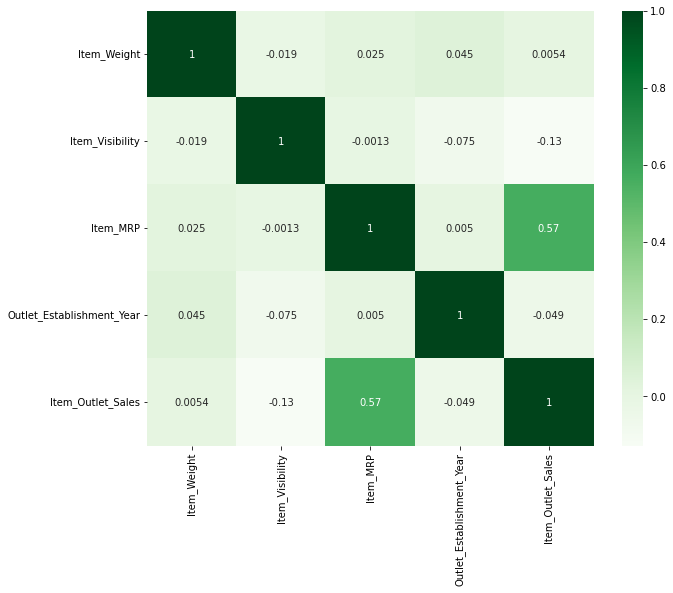

In [41]:
corr = df.corr()

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [42]:
df['Item_MRP'].sort_values().isnull().any()

False

In [43]:
df['Item_Outlet_Sales'].sort_values().isnull().any()

False

In [44]:
#There are 16 different types of food Items
df['Item_Type'].nunique()

16

In [45]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [46]:
df['Outlet_Establishment_Year'].value_counts().sort_index()

1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

In [47]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
# NEITHER OF THESE ARE REALLY FILTERS
Materials_filter = df['Item_MRP'].value_counts()
Materials_filter

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [49]:
df['Item_MRP'].value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [50]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

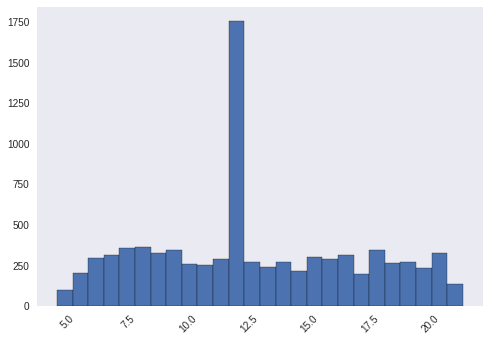

In [51]:
plt.style.use('seaborn')
MRP_filter = df.loc[:, 'Item_Weight'] <= 25
df.loc[MRP_filter, 'Item_Weight'].hist(bins = 'auto',
                                   edgecolor='black')
plt.grid()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
#The Item wholesale column has a bimodal distribution

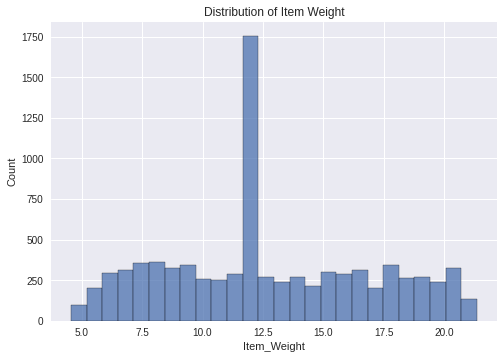

In [52]:
# SIMPLIFIED CODE
ax = sns.histplot(data=df, x='Item_Weight',bins='auto');
ax.set_title('Distribution of Item Weight');

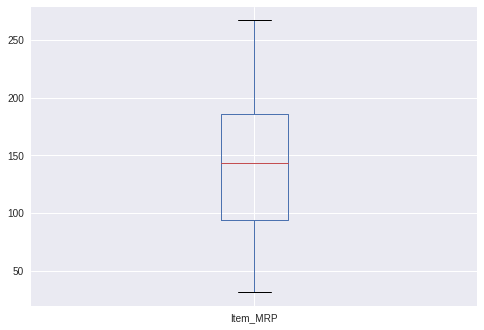

In [53]:
df.boxplot(column = 'Item_MRP');


count    8523.000000
mean       12.710428
std         4.238481
min         4.555000
25%         9.310000
50%        12.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

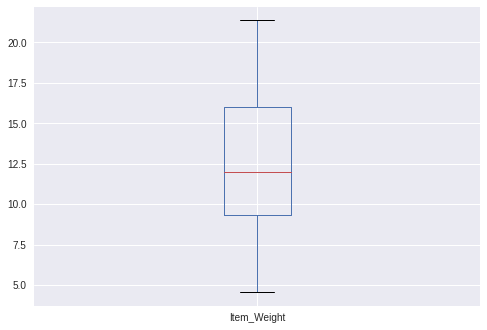

In [54]:
df.boxplot(column = 'Item_Weight');
df['Item_Weight'].describe()

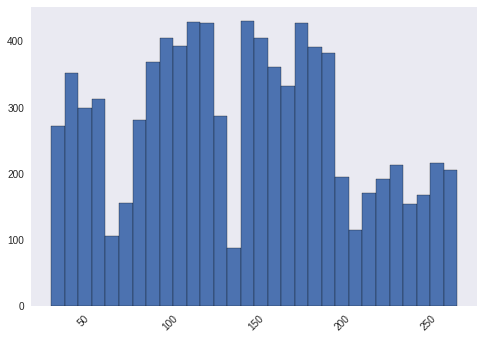

In [55]:
plt.style.use('seaborn')
MRP_filter = df.loc[:, 'Item_MRP'] <= 300
df.loc[MRP_filter, 'Item_MRP'].hist(bins = 30,
                                   edgecolor='black')
plt.grid()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
#The Item wholesale column has a bimodal distribution

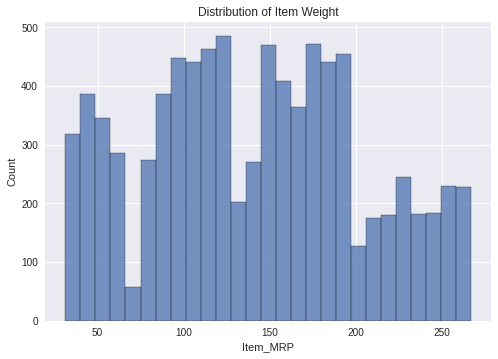

In [56]:
ax = sns.histplot(data=df, x='Item_MRP', bins='auto');
ax.set_title('Distribution of Item Weight');

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

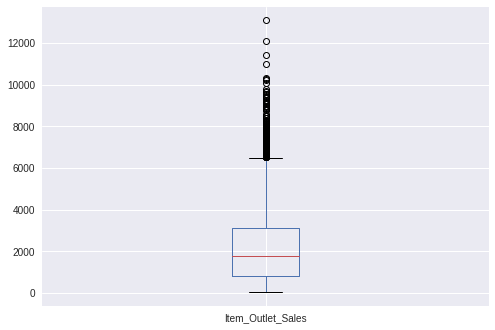

In [57]:
df.boxplot(column = 'Item_Outlet_Sales');
df['Item_Outlet_Sales'].describe()

In [58]:
from itertools import groupby
item_type_group = df.sort_values(by=('Item_MRP'), ascending=False).groupby('Item_Type')
item_type_group

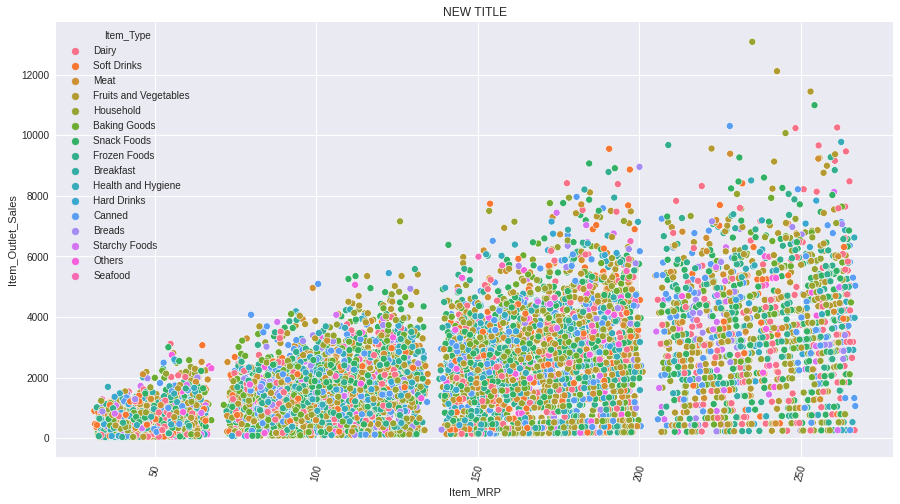

In [59]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('NEW TITLE')
ax = sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", hue=df["Item_Type"], data=df)
## This scatterplot was constructed based on the highest correlation in our heatmap. However it really doesn't tell me much about the relation between the highest corellated columns

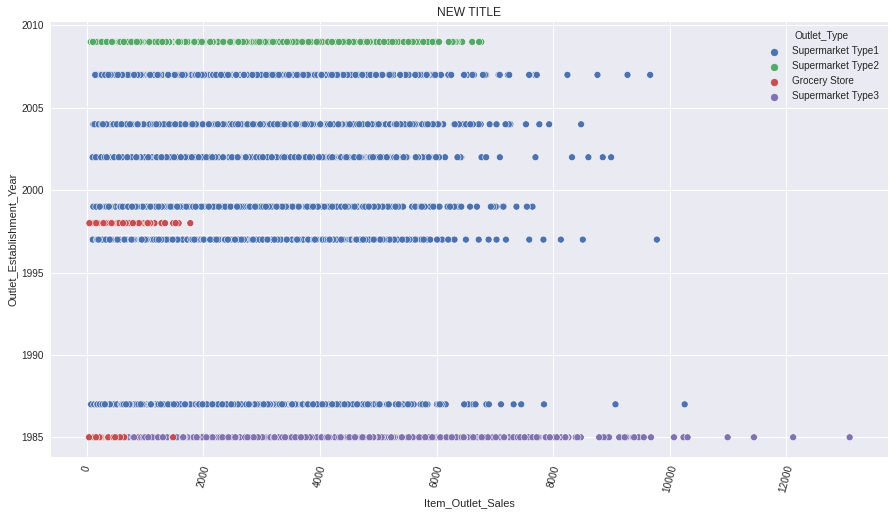

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('NEW TITLE')
ax = sns.scatterplot(x="Item_Outlet_Sales", y="Outlet_Establishment_Year", hue=df["Outlet_Type"], data=df)
## This graph displays Oulet Sales by establishment year with Supermarket Type3 having the high sale performance.

<a list of 16 Text major ticklabel objects>

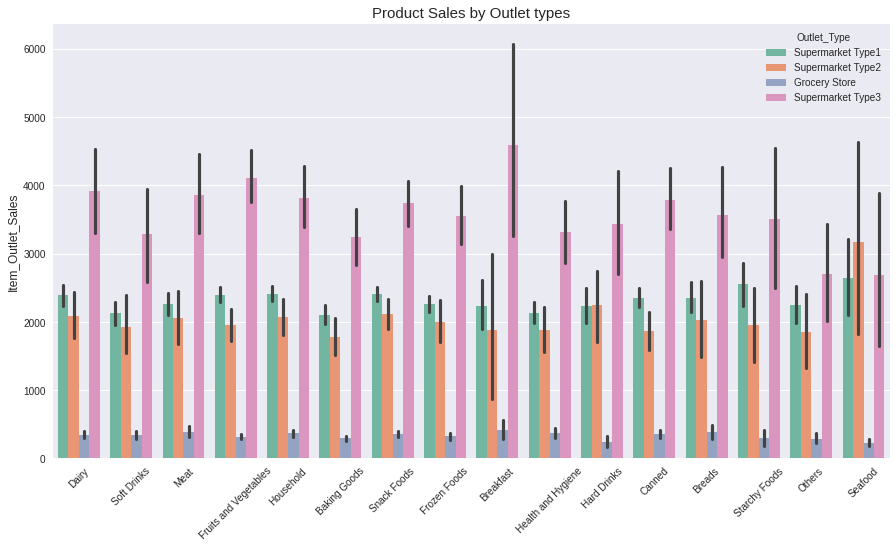

In [61]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
ax2 = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue=df["Outlet_Type"], data=df, palette="Set2")
ax2.set_title("Product Sales by Outlet types", fontsize=15)
ax2.set_xlabel("", fontsize=12)
ax2.set_ylabel("Item_Outlet_Sales", fontsize=12)
ax2.get_xticklabels()
## For each product grocery stores have the lowest outlet sales among any Outlet type out of any product.

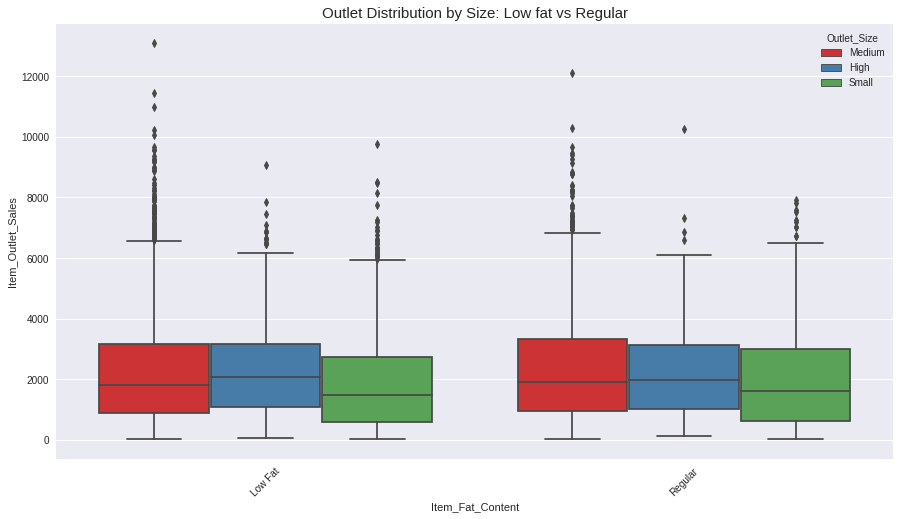

In [62]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Outlet Distribution by Size: Low fat vs Regular', fontsize=15)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', hue="Outlet_Size", data=df, palette="Set1")
## The distributions for both are nearly symetrical for the 25th, median and 75th quartiles. However small size outlets have higher maximums for small sized Regular outlets in regards to sales for fat content compared to small sized Low Fat outlets